<a href="https://colab.research.google.com/github/SHAIKHHUZEFA/basic-django-project/blob/master/analysis%20on%20loan%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np

In [0]:
df=pd.read_csv('/gdrive/My Drive/loan.csv')

In [0]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df.shape

(614, 13)

In [0]:
df.shape

(614, 13)

In [0]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df['LoanAmount'].mean()

146.41216216216216

In [0]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [0]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [0]:
df1=df.fillna({'LoanAmount':146.0,
               'Credit_History':0.0})

In [0]:
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df2=df1.fillna(method='ffill')

In [0]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df2.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show>

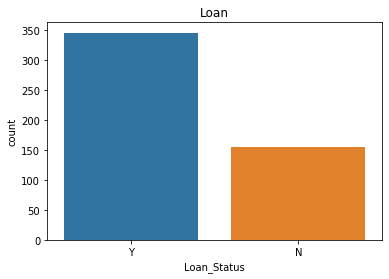

In [0]:
Silver=df2[df2.Gender=='Male']
sns.countplot(x="Loan_Status", data=Silver)
plt.title("Loan")
plt.show

<function matplotlib.pyplot.show>

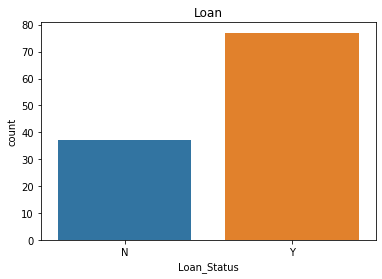

In [0]:
silver=df2[df2.Gender=='Female']
sns.countplot(x="Loan_Status",data=silver)
plt.title("Loan")
plt.show

<function matplotlib.pyplot.show>

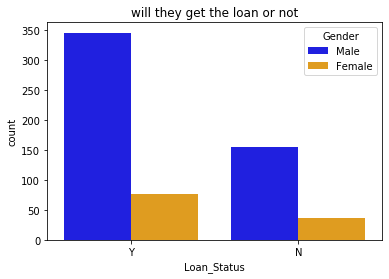

In [0]:
sns.countplot(data=df2,x='Loan_Status',hue='Gender',palette=('blue','orange'))
plt.title('will they get the loan or not')
plt.show

<function matplotlib.pyplot.show>

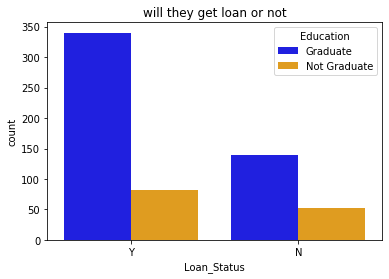

In [0]:
sns.countplot(data=df2,x='Loan_Status',hue='Education',palette=('blue','orange'))
plt.title('will they get loan or not')
plt.show

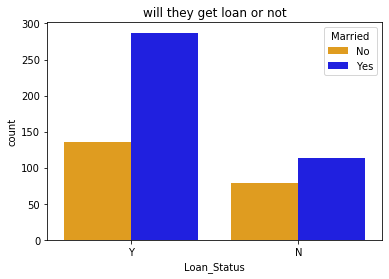

In [0]:
sns.countplot(data=df2,x='Loan_Status',hue='Married',palette=('orange','blue'))
plt.title('will they get loan or not')
plt.show()

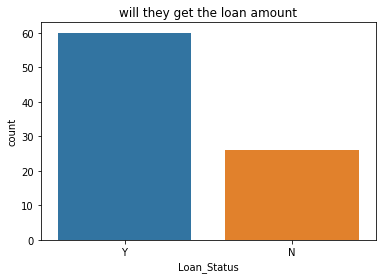

In [0]:
data1=df2[df2.Self_Employed=='Yes']
sns.countplot(x='Loan_Status',data=data1)
plt.title('will they get the loan amount')
plt.show()

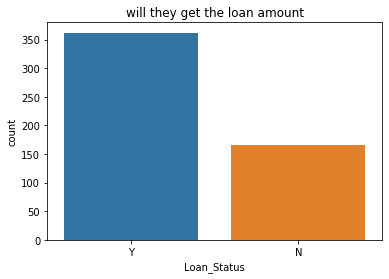

In [0]:
data1=df2[df2.Self_Employed=='No']
sns.countplot(x='Loan_Status',data=data1)
plt.title('will they get the loan amount')
plt.show()

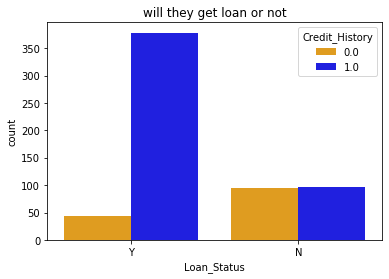

In [0]:
sns.countplot(data=df2,x='Loan_Status',hue='Credit_History',palette=('orange','blue'))
plt.title('will they get loan or not')
plt.show()

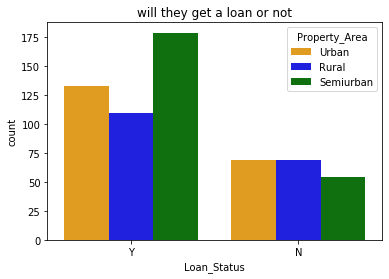

In [0]:
sns.countplot(data=df2,x='Loan_Status',hue='Property_Area',palette=('orange','blue','green'))
plt.title('will they get a loan or not')
plt.show()

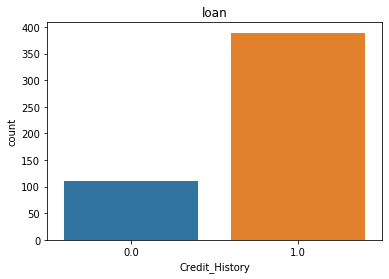

In [0]:
data2=df2[df2.Gender=='Male']
sns.countplot(x='Credit_History',data=data2)
plt.title('loan')
plt.show()

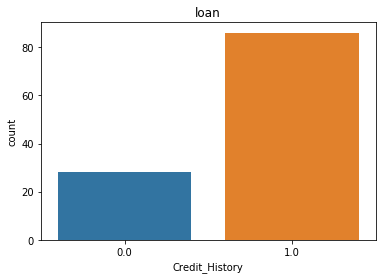

In [0]:
data2=df2[df2.Gender=='Female']
sns.countplot(x='Credit_History',data=data2)
plt.title('loan')
plt.show()

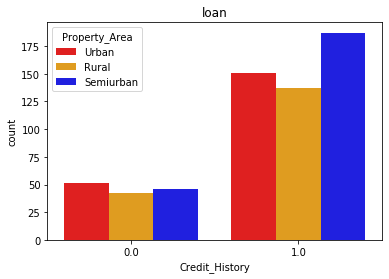

In [0]:
sns.countplot(data=df2,x='Credit_History',hue='Property_Area',palette=('red','orange','blue'))
plt.title('loan')
plt.show()

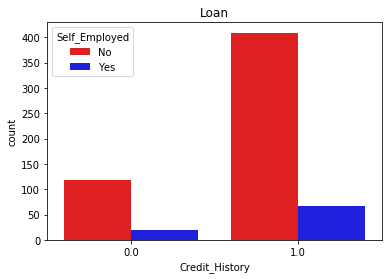

In [0]:
sns.countplot(data=df2,x='Credit_History',hue='Self_Employed',palette=('red','blue','orange'))
plt.title('Loan')
plt.show()

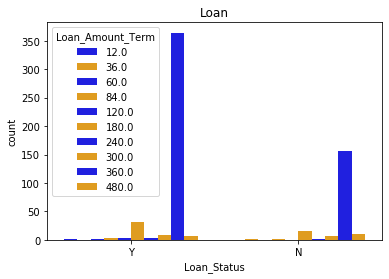

In [0]:
sns.countplot(data=df2,x='Loan_Status',hue='Loan_Amount_Term',palette=('blue','orange'))
plt.title('Loan')
plt.show()

In [0]:
# in upper dig we can say who has a Loan amount term is 360 they are etting more loan
df3=df.loc[df2['Loan_Amount_Term']>300]

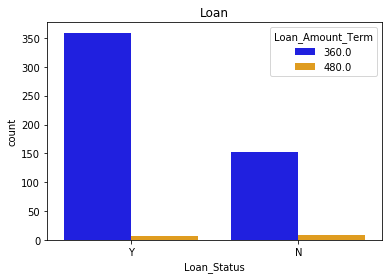

In [0]:
sns.countplot(data=df3,x='Loan_Status',hue='Loan_Amount_Term',palette=('blue','orange'))
plt.title('Loan')
plt.show()

In [0]:
df2.ApplicantIncome.value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [0]:
df4=df.loc[df['ApplicantIncome']>20000]

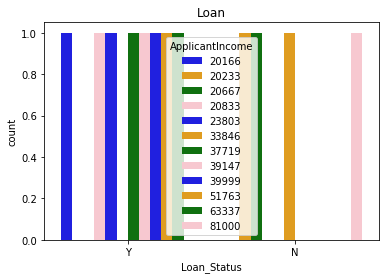

In [0]:
sns.countplot(data=df4,x='Loan_Status',hue='ApplicantIncome',palette=('blue','orange','green','pink'))
plt.title('Loan')
plt.show()

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
new_df=df2.select_dtypes(include=['int64','float64'])
new_df1=df2.select_dtypes(exclude=['int64','float64'])

In [0]:
df_encode=new_df1.apply(LabelEncoder().fit_transform)

In [0]:
df2=df_encode.join(new_df)

In [0]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,2,1,5849,0.0,146.0,360.0,1.0
1,1,1,1,1,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,2,1,1,0,0,1,2,1,3000,0.0,66.0,360.0,1.0
3,3,1,1,0,1,0,2,1,2583,2358.0,120.0,360.0,1.0
4,4,1,0,0,0,0,2,1,6000,0.0,141.0,360.0,1.0


In [0]:
df2=df2.drop(labels=['Loan_ID'],axis=1)

In [0]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849,0.0,146.0,360.0,1.0
1,1,1,1,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000,0.0,141.0,360.0,1.0


In [0]:
df2.Property_Area.value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(df2.drop(labels=['Loan_Status'],axis=1),df2[['Loan_Status']],test_size=0.3,random_state=1)

In [0]:
model=LogisticRegression()

In [0]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred=model.predict(X_test)

In [0]:
pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1])

In [0]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
533,1,0,1,0,0,1,11250,0.0,196.0,360.0,0.0
544,0,1,0,1,0,1,3017,663.0,102.0,360.0,0.0
41,1,0,0,0,0,2,1800,1213.0,47.0,360.0,1.0
148,0,0,0,0,0,0,10000,1666.0,225.0,360.0,1.0
111,0,1,0,0,0,1,2929,2333.0,139.0,360.0,1.0


In [0]:
model.score(X_train,Y_train)

0.7715617715617715

In [0]:
model.score(X_test,Y_test)

0.772972972972973

In [0]:
import warnings

In [0]:
warnings.filterwarnings('ignore')

In [0]:
#use brute force technique
for i in range(1,100):
  X_train,X_test,Y_train,Y_test=train_test_split(df2.drop(labels=['Loan_Status'],axis=1),df2[['Loan_Status']],test_size=0.3,random_state=i)

  model2=LogisticRegression()
  model2.fit(X_train,Y_train)

  train_score=model2.score(X_train,Y_train)
  test_score=model2.score(X_test,Y_test)

  if test_score>train_score:
    print('train score {} test score {} rando state {}'.format(train_score,test_score,i))


train score 0.7715617715617715 test score 0.772972972972973 rando state 1
train score 0.7668997668997669 test score 0.7675675675675676 rando state 2
train score 0.7622377622377622 test score 0.7945945945945946 rando state 3
train score 0.7762237762237763 test score 0.7837837837837838 rando state 6
train score 0.7645687645687645 test score 0.7891891891891892 rando state 7
train score 0.7505827505827506 test score 0.8162162162162162 rando state 8
train score 0.7692307692307693 test score 0.7891891891891892 rando state 13
train score 0.7622377622377622 test score 0.7783783783783784 rando state 15
train score 0.7435897435897436 test score 0.7891891891891892 rando state 18
train score 0.7715617715617715 test score 0.7837837837837838 rando state 19
train score 0.7692307692307693 test score 0.7945945945945946 rando state 21
train score 0.745920745920746 test score 0.8216216216216217 rando state 22
train score 0.7668997668997669 test score 0.7837837837837838 rando state 25
train score 0.752913

In [0]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(df2.drop(labels=['Loan_Status'],axis=1),df2[['Loan_Status']],test_size=0.3,random_state=1)

In [0]:
model3=DecisionTreeClassifier(max_depth=100,max_leaf_nodes=100,max_features=11)

In [0]:
model3.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=11, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
model3.score(X_train,Y_train)

0.9976689976689976

In [0]:
model3.score(X_test,Y_test)

0.6432432432432432

In [0]:
for i in range(1,100):
  X_train,X_test,Y_train,Y_test=train_test_split(df2.drop(labels=['Loan_Status'],axis=1),df2[['Loan_Status']],test_size=0.3,random_state=i)

  model4=DecisionTreeClassifier(max_depth=100,max_leaf_nodes=100,max_features=11)
  model4.fit(X_train,Y_train)

  train_score=model4.score(X_train,Y_train)
  test_score=model4.score(X_test,Y_test)

  if test_score>train_score:
    print('train score {} test score {} rando state {}'.format(train_score,test_score,i))

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(df2.drop(labels=['Loan_Status'],axis=1),df2[['Loan_Status']],test_size=0.3,random_state=1)

In [0]:
model5=RandomForestClassifier(max_features=11,min_samples_split=11,n_estimators=100)

In [0]:
model5.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
model5.score(X_train,Y_train)

0.9044289044289044

In [0]:
model5.score(X_test,Y_test)

0.7243243243243244

In [0]:
for i in range(1,100):
  X_train,X_test,Y_train,Y_test=train_test_split(df2.drop(labels=['Loan_Status'],axis=1),df2[['Loan_Status']],test_size=0.3,random_state=i)

  model6 = RandomForestClassifier(max_features=10,min_samples_split=10,n_estimators=100) 
  model6.fit(X_train,Y_train)

  train_score=model6.score(X_train,Y_train)
  test_score=model6.score(X_test,Y_test)

  if test_score>train_score:
    print('train score {} test score {} rando state {}'.format(train_score,test_score,i))


In [0]:
from sklearn.svm import SVC

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(df2.drop(labels=['Loan_Status'],axis=1),df2[['Loan_Status']],test_size=0.3,random_state=8)

In [0]:
finalmodel=SVC(kernel='linear',gamma=0.1)

In [0]:
finalmodel.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred=finalmodel.predict(X_test)

In [0]:
finalmodel.score(X_train,Y_train)

0.7319347319347319

In [0]:
finalmodel.score(X_test,Y_test)

0.7837837837837838

In [0]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849,0.0,146.0,360.0,1.0
1,1,1,1,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000,0.0,141.0,360.0,1.0


In [0]:
finalmodel.predict([[1,0,0,0,0,2,5849,0.0,146.0,360.0,1.0]])

array([1])

In [0]:
for i in range(1,100):
  X_train,X_test,Y_train,Y_test=train_test_split(df2.drop(labels=['Loan_Status'],axis=1),df2[['Loan_Status']],test_size=0.3,random_state=i)

  model7= SVC(kernel='linear',gamma=0.1)
  model7.fit(X_train,Y_train)

  train_score=model7.score(X_train,Y_train)
  test_score=model7.score(X_test,Y_test)

  if test_score>train_score:
    print('train score {} test score {} rando state {}'.format(train_score,test_score,i))

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
cm=confusion_matrix(Y_test,pred)

In [0]:
cm

array([[ 20,  32],
       [  8, 125]])

In [0]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        52
           1       0.80      0.94      0.86       133

    accuracy                           0.78       185
   macro avg       0.76      0.66      0.68       185
weighted avg       0.77      0.78      0.76       185



In [0]:
acc=(cm[0,0]+cm[1,1])/Y_test.size

In [0]:
acc

0.7837837837837838